# Classification Problem
Classification problem are an important category of problems in analytics in which the outcome variable or response variable (Y) takes discrete values. Primary objective of a classification model is to predict the probability of an observation belonging to a class, known as class probability. 
Classification problem may have binary or multiple outcomes or classes. Binary outcomes are called binary classification and multiple outcomes are callead as multinomial classification. There are several techniques for solving classification problems such as logistic regression, classfication trees, discriminate analysis, neural networks and support vector machines. 

# Binary Logistic Classification
Logistic regression is a statistical model in which the response variable takes a discrete value and the explanatory variables can either be continous or discrete. If the outcome variable takes only two values, then the model is called binary logstic regression model. Assume that the outcomes are called positive (usaullay coded as Y = 1) and negative (usually coded as Y= 0). Then the probability that a record beloongs to a positive class, P(Y=1), using the binary logisitic regression model is given by

P(Y=1) = e^z/1+e^z
Where Z = Beta0 + Beta1X1 + Beta2X2 + ... + BetamXm
Here X1, X2 ... are the independent variables or features. The logistic regression has an S-shaped curve, and gives the class probability of an observation belonging to class labelled as 1, that is P(Y=1)

Equation can be re-writtein as:

ln(P(Y=1)/1-P(Y=1)) = Z = Beta0 + Beta1X1 + Beta2X2 + ... + BetamXm

The left hand side of equation is a log natural of odds and is know as logit function; the right-hand side is a linear function. Such models are called Generalized linear models (GLM). 

In GLM the erros may not follow normal distribution and there exists a transformation function of the outcome variable that takes a linear functional form.

The logistic function has an S-shared curve asl konw as Sigmoid fuctions. 

# Example study using Credit Classification using German Credit rating dataset from University of California Irvine (UCI) machine learning laboratory.

In [1]:
import pandas as pd
import numpy as np

In [2]:
credit_df = pd.read_csv("German Credit Data.csv")

In [3]:
credit_df.head(5)

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [6]:
credit_df.shape

(1000, 14)

In [8]:
credit_df.columns

Index(['checkin_acc', 'duration', 'credit_history', 'amount', 'savings_acc',
       'present_emp_since', 'inst_rate', 'personal_status', 'residing_since',
       'age', 'inst_plans', 'num_credits', 'job', 'status'],
      dtype='object')

In [9]:
credit_df["inst_plans"].unique()

array(['A143', 'A141', 'A142'], dtype=object)

In [10]:
credit_df["checkin_acc"].unique()

array(['A11', 'A12', 'A14', 'A13'], dtype=object)

In [13]:
credit_df.status.value_counts()
# The observations that are good credit is represented by the value of 0
# The observations that are bad credit is represented by the value of 1

status
0    700
1    300
Name: count, dtype: int64

In [14]:
credit_df.checkin_acc.value_counts()
# Checkin_acc has the following categories
# 1. A11 : ... <0 DM
# 2. A12: 0 < = <200 DM
# 3. A13: ...>= 200 DM/salary assignments for at least 1 year
# 4. A14: no checking account

checkin_acc
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64

### For building a classificaiton model using this credit data, we will use the column named status as the dependent vairable, while the remaining columns will be independent variables or features. We will create a list named X_features and store the names of all independent variable for future uses.

In [16]:
credit_df.columns

Index(['checkin_acc', 'duration', 'credit_history', 'amount', 'savings_acc',
       'present_emp_since', 'inst_rate', 'personal_status', 'residing_since',
       'age', 'inst_plans', 'num_credits', 'job', 'status'],
      dtype='object')

In [17]:
X_features = list(credit_df.columns)

In [19]:
X_features.remove("status")

In [22]:
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

## Encoding Categoricaal data
There are several Categorical Features in the data, which need to be bindary encoded using dummy variables.

In [42]:
encoded_credit_df = pd.get_dummies(credit_df[X_features], drop_first = True, dtype=float)

In [43]:
encoded_credit_df

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,48,5951,2,2,22,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,12,2096,2,3,49,1,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,42,7882,2,4,45,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24,4870,3,4,53,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
996,30,3857,4,4,40,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,12,804,4,4,38,1,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
998,45,1845,4,4,23,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [44]:
encoded_credit_df.columns

Index(['duration', 'amount', 'inst_rate', 'residing_since', 'age',
       'num_credits', 'checkin_acc_A12', 'checkin_acc_A13', 'checkin_acc_A14',
       'credit_history_A31', 'credit_history_A32', 'credit_history_A33',
       'credit_history_A34', 'savings_acc_A62', 'savings_acc_A63',
       'savings_acc_A64', 'savings_acc_A65', 'present_emp_since_A72',
       'present_emp_since_A73', 'present_emp_since_A74',
       'present_emp_since_A75', 'personal_status_A92', 'personal_status_A93',
       'personal_status_A94', 'inst_plans_A142', 'inst_plans_A143', 'job_A172',
       'job_A173', 'job_A174'],
      dtype='object')

In [45]:
encoded_credit_df[["checkin_acc_A12", "checkin_acc_A13", "checkin_acc_A14"]]

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
995,0.0,0.0,1.0
996,0.0,0.0,0.0
997,0.0,0.0,1.0
998,0.0,0.0,0.0


In [47]:
encoded_credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   duration               1000 non-null   int64  
 1   amount                 1000 non-null   int64  
 2   inst_rate              1000 non-null   int64  
 3   residing_since         1000 non-null   int64  
 4   age                    1000 non-null   int64  
 5   num_credits            1000 non-null   int64  
 6   checkin_acc_A12        1000 non-null   float64
 7   checkin_acc_A13        1000 non-null   float64
 8   checkin_acc_A14        1000 non-null   float64
 9   credit_history_A31     1000 non-null   float64
 10  credit_history_A32     1000 non-null   float64
 11  credit_history_A33     1000 non-null   float64
 12  credit_history_A34     1000 non-null   float64
 13  savings_acc_A62        1000 non-null   float64
 14  savings_acc_A63        1000 non-null   float64
 15  savin

In [48]:
import statsmodels.api as sm


In [54]:
Y = credit_df.status

In [55]:
Y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: status, Length: 1000, dtype: int64

In [56]:
type(Y)

pandas.core.series.Series

In [57]:
X = sm.add_constant(encoded_credit_df)

In [58]:
X

,const,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,1.0,6,1169,4,4,67,2,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,48,5951,2,2,22,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,12,2096,2,3,49,1,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,42,7882,2,4,45,1,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,24,4870,3,4,53,2,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,12,1736,3,4,31,1,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
996,1.0,30,3857,4,4,40,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,1.0,12,804,4,4,38,1,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
998,1.0,45,1845,4,4,23,1,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [68]:
# X_train and Y_train contains the independent Variables and reponse variables for the training dataset
# X_test and Y_test contains the independent variables and reposnse varriable for the validation or test dataset

# Building Logistic Regression Model

In [69]:
import statsmodels.api as sm
logit = sm.Logit(Y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6


In [72]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Method:            MLE       
Dependent Variable:   status            Pseudo R-squared:  0.198     
Date:                 2024-11-04 15:22  AIC:               744.5132  
No. Observations:     700               BIC:               881.0456  
Df Model:             29                Log-Likelihood:    -342.26   
Df Residuals:         670               LL-Null:           -426.75   
Converged:            1.0000            LLR p-value:       1.0630e-21
No. Iterations:       6.0000            Scale:             1.0000    
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.1511   1.1349 -0.1331 0.8941 -2.3754  2.0733
duration               0.0206   0.0104  1.9927 0.0463  0.0003  0.0409
amount                 0.0001   0.0000  2.3765 0.0175  0.0000  0.0002
inst_rate              0.3064   0.0986  3.1083 0.0019  0.1132  0.4996
residing_since         0.0967   0.0920  1.0511 0.2932 -0.0836  0.2771
age                   -0.0227   0.0103 -2.2131 0.0269 -0.0428 -0.0026
num_credits            0.2854   0.2139  1.3342 0.1821 -0.1338  0.7045
checkin_acc_A12       -0.4126   0.2391 -1.7260 0.0843 -0.8812  0.0559
checkin_acc_A13       -0.9053   0.4338 -2.0868 0.0369 -1.7556 -0.0550
checkin_acc_A14       -1.6052   0.2586 -6.2073 0.0000 -2.1120 -1.0983
credit_history_A31     0.1532   0.5795  0.2643 0.7916 -0.9827  1.2890
credit_history_A32    -0.4960   0.4411 -1.1245 0.2608 -1.3604  0.3685
credit_history_A33    -0.8881   0.5022 -1.7683 0.0770 -1.8724  0.0962
credit_history_A34    -1.4124   0.4528 -3.1190 0.0018 -2.2999 -0.5249
savings_acc_A62       -0.0496   0.3208 -0.1545 0.8772 -0.6782  0.5791
savings_acc_A63       -0.6640   0.4818 -1.3779 0.1682 -1.6084  0.2804
savings_acc_A64       -1.1099   0.6019 -1.8439 0.0652 -2.2896  0.0699
savings_acc_A65       -0.6061   0.2745 -2.2080 0.0272 -1.1441 -0.0681
present_emp_since_A72  0.0855   0.4722  0.1810 0.8564 -0.8401  1.0110
present_emp_since_A73 -0.0339   0.4492 -0.0754 0.9399 -0.9142  0.8465
present_emp_since_A74 -0.3789   0.4790 -0.7910 0.4289 -1.3178  0.5600
present_emp_since_A75 -0.2605   0.4554 -0.5721 0.5673 -1.1532  0.6321
personal_status_A92   -0.0069   0.4841 -0.0142 0.9887 -0.9557  0.9419
personal_status_A93   -0.4426   0.4764 -0.9291 0.3528 -1.3762  0.4911
personal_status_A94   -0.3080   0.5554 -0.5546 0.5792 -1.3967  0.7806
inst_plans_A142       -0.2976   0.5157 -0.5772 0.5638 -1.3084  0.7131
inst_plans_A143       -0.4458   0.2771 -1.6086 0.1077 -0.9889  0.0974
job_A172              -0.0955   0.7681 -0.1243 0.9011 -1.6009  1.4100
job_A173              -0.0198   0.7378 -0.0269 0.9786 -1.4658  1.4262
job_A174              -0.0428   0.7371 -0.0581 0.9537 -1.4876  1.4019
=====================================================================

"""

# Model Diagnostics
The following measures are used to validate a logistic regression model
1. Wald's Test (A Chi-squared test) for checking the statistical significance of individual predictors (feature) variables. This is equivalentt to t-test in the MLR Multiple Linear Regression Model
2. Likelihood ratio test for checking the statistial significance of the overaall model (LLR p-value is reported in the output). Likelihood ratio test is also used for vaiable (feature) selection.
3. Pseudo R-Squared: It is a measure of goodness of the model. It is called pseudo R^2 because it does not have the same interpretation of R^2 as in the MLR model.
                                                                                                                                                                 

In [89]:
def get_significant_vars(lm):
    #Store the p-values and corresponding column nmaes in a datafram
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    #filter the column names where p-valuses is less than 0.05
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]["vars"])

    

In [90]:
significant_vars = get_significant_vars(logit_model)

In [92]:
significant_vars

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

In [93]:
# Only the features "duration", "amount", "inst_rate", "age", "checkin_acc_A13", "checkin_acc_A14", "credit_history_A34" and "savings_acc_A65" have come out as significant variables. 
# Now we can build a logistic regresssion using only these significant variables

In [97]:
logit_model_2 = sm.Logit(Y_train,sm.add_constant( X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


In [98]:
logit_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Method:           MLE       
Dependent Variable:  status           Pseudo R-squared: 0.161     
Date:                2024-11-04 15:56 AIC:              733.8898  
No. Observations:    700              BIC:              774.8495  
Df Model:            8                Log-Likelihood:   -357.94   
Df Residuals:        691              LL-Null:          -426.75   
Converged:           1.0000           LLR p-value:      7.4185e-26
No. Iterations:      6.0000           Scale:            1.0000    
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.8969   0.4364 -2.0551 0.0399 -1.7523 -0.0415
duration            0.0197   0.0098  2.0033 0.0451  0.0004  0.0390
amount              0.0001   0.0000  2.3205 0.0203  0.0000  0.0002
inst_rate           0.2811   0.0929  3.0264 0.0025  0.0991  0.4632
age                -0.0216   0.0089 -2.4207 0.0155 -0.0392 -0.0041
checkin_acc_A13    -0.8038   0.4081 -1.9697 0.0489 -1.6037 -0.0040
checkin_acc_A14    -1.5452   0.2187 -7.0649 0.0000 -1.9738 -1.1165
credit_history_A34 -0.8781   0.2319 -3.7858 0.0002 -1.3327 -0.4235
savings_acc_A65    -0.5448   0.2581 -2.1108 0.0348 -1.0507 -0.0389
==================================================================

"""

# The negative sign in coefficient value indicates that as the value of this variable increases, the probability of being a bad credit decreases, that is P(Y=1) decreases. A positive sign means that the probabitly of being a bad credit increases as the corresponding value of the variable increases. Some observation from the model outputs are:
1. The log of odds ratio or probability of being a bad credit increases as duration, amount, inst_rate increases. For example, one unit change in duration results in 0.019723 unit change in log of odds ratio
2. The probability of being a bad credit decreases as age increases. This means that older people tend to pay back their credits ontime compared to younger people.


# Predicting on Test Data

In [129]:
Y_pred_df = pd.DataFrame({"Actual": Y_test, "Predicted_Prob" : logit_model_2.predict(sm.add_constant(X_test[significant_vars]))})

Y_pred_df.sample(10, random_state = 42)

In [130]:
# To understand how many observations the model has classified correctly and how many it has not, a cut-off probability needs to be assumed. Assume that the cut-off probability is 0.5; then all obsrvation with predited progability of more than 0.5 will be predicted as Bad credits and rest all as good credits. 
Y_pred_df['Predicted'] = Y_pred_df.Predicted_Prob.map(lambda x: 1 if x > 0.5 else 0 )
Y_pred_df.sample(10, random_state = 42)

,Actual,Predicted_Prob,Predicted
557,1,0.080493,0
798,0,0.076653,0
977,0,0.345979,0
136,0,0.249919,0
575,0,0.062264,0
544,0,0.040768,0
332,1,0.833093,1
917,1,0.370667,0
678,0,0.388392,0
363,0,0.088952,0


# Creating a Confusion Matrix


In [211]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


In [212]:
from sklearn import metrics

In [213]:
def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted)
    sn.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["GOOD Credit", "BAD Credit"], yticklabels = ["Good Credit", "Bad Credit"])
    plt.ylabel ("True Label")
    plt.xlabel ("Predicted Label")
    plt.show()

In [214]:
Y_pred_df

,Actual,Predicted_Prob,Predicted
521,1,0.452449,0
737,0,0.491820,0
740,0,0.418416,0
660,0,0.270285,0
411,0,0.132119,0
...,...,...,...
468,0,0.178787,0
935,1,0.587925,1
428,0,0.091998,0
7,0,0.571859,1


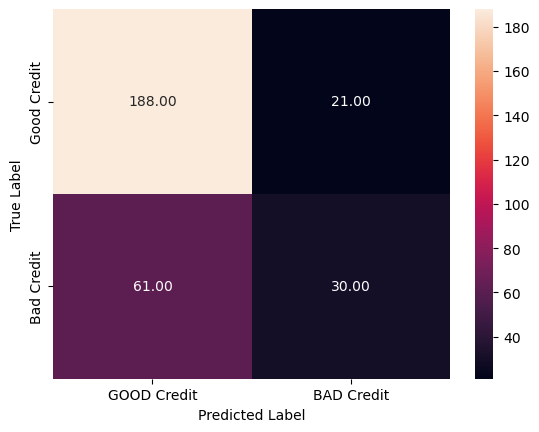

In [215]:
draw_cm(Y_pred_df.Actual, Y_pred_df.Predicted)

In [216]:
Y_pred_df["Predicted"]

521    0
737    0
740    0
660    0
411    0
      ..
468    0
935    1
428    0
7      1
155    0
Name: Predicted, Length: 300, dtype: int64

In [217]:
type(Y_pred_df)

pandas.core.frame.DataFrame

In [218]:
Y_pred_df

,Actual,Predicted_Prob,Predicted
521,1,0.452449,0
737,0,0.491820,0
740,0,0.418416,0
660,0,0.270285,0
411,0,0.132119,0
...,...,...,...
468,0,0.178787,0
935,1,0.587925,1
428,0,0.091998,0
7,0,0.571859,1


In [219]:
filtered_df = Y_pred_df.loc[(Y_pred_df['Actual'] == 1) & (Y_pred_df['Predicted'] == 1)]
print (filtered_df)


     Actual  Predicted_Prob  Predicted
76        1        0.668919          1
973       1        0.792026          1
938       1        0.752077          1
235       1        0.556699          1
59        1        0.540886          1
570       1        0.626154          1
542       1        0.554130          1
548       1        0.501316          1
998       1        0.689040          1
714       1        0.898689          1
522       1        0.606852          1
63        1        0.812322          1
528       1        0.619898          1
583       1        0.611529          1
914       1        0.583096          1
321       1        0.548743          1
677       1        0.751532          1
355       1        0.580186          1
199       1        0.532989          1
332       1        0.833093          1
29        1        0.605137          1
596       1        0.584794          1
192       1        0.588875          1
789       1        0.533417          1
381       1        0.6755

In [220]:
filtered_df.shape

(30, 3)

In [221]:
filtered_df = Y_pred_df.loc[(Y_pred_df['Actual'] == 0) & (Y_pred_df['Predicted'] == 1)]
print (filtered_df)

     Actual  Predicted_Prob  Predicted
513       0        0.521960          1
101       0        0.655362          1
687       0        0.637588          1
866       0        0.557029          1
741       0        0.507067          1
67        0        0.521337          1
88        0        0.537586          1
959       0        0.586193          1
650       0        0.693113          1
310       0        0.500675          1
829       0        0.611315          1
208       0        0.579110          1
141       0        0.679573          1
896       0        0.571412          1
481       0        0.563219          1
3         0        0.569935          1
286       0        0.745435          1
323       0        0.558128          1
97        0        0.525002          1
587       0        0.533529          1
7         0        0.571859          1


In [222]:
filtered_df.shape

(21, 3)

# Measuring Acccuracies
In classification, the model performance is often measured using concepts such as sensitivity, specficity, precision and F-Score. 
## The ability of the model to correctly classify positives and negatives is called Sensitivity also known as recall or true positive rate and 

## Specificity (also know as true negative rate)

# Sensitivity (True Positive Rate / Recall)
Sensitivity = TP / (TP + FN)

# Specificity (True Negative Rate)
Specificity = FN / (FN + FP)

# Precision
Precision = TP / (TP + FP)

# F-Score
F-Score = 2 x Recall x Precision / (Recall + Precision)


Sure! Let's break down these important metrics used in evaluating the performance of a classification model with a simple example.

### Example Scenario
Imagine we have a model that predicts whether a patient has a certain disease (positive) or not (negative). We test this model on 100 patients, and the results are summarized in a confusion matrix:

|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| Actual Positive| 50                 | 10                 |
| Actual Negative| 5                  | 35                 |

From this confusion matrix, we can derive the following values:
- **True Positives (TP)**: 50 (patients correctly predicted to have the disease)
- **False Positives (FP)**: 5 (patients incorrectly predicted to have the disease)
- **True Negatives (TN)**: 35 (patients correctly predicted not to have the disease)
- **False Negatives (FN)**: 10 (patients incorrectly predicted not to have the disease)

### Sensitivity (Recall)
**Sensitivity** measures the proportion of actual positives that are correctly identified by the model.

\[
\text{Sensitivity} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{50}{50 + 10} = \frac{50}{60} \approx 0.83
\]

This means the model correctly identifies 83% of the patients who have the disease.

### Specificity
**Specificity** measures the proportion of actual negatives that are correctly identified by the model.

\[
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}} = \frac{35}{35 + 5} = \frac{35}{40} = 0.875
\]

This means the model correctly identifies 87.5% of the patients who do not have the disease.

### Precision
**Precision** measures the proportion of predicted positives that are actually positive.

\[
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{50}{50 + 5} = \frac{50}{55} \approx 0.91
\]

This means that 91% of the patients predicted to have the disease actually have it.

### F-Score (F1-Score)
The **F-Score** is the harmonic mean of precision and recall, providing a balance between the two metrics.

\[
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.91 \times 0.83}{0.91 + 0.83} \approx 0.87
\]

This means the F1-Score is 0.87, indicating a good balance between precision and recall.

### Summary
- **Sensitivity (Recall)**: 83% - The model correctly identifies 83% of the actual positives.
- **Specificity**: 87.5% - The model correctly identifies 87.5% of the actual negatives.
- **Precision**: 91% - Of the predicted positives, 91% are actually positive.
- **F1-Score**: 87% - A balanced measure of the model's precision and recall.

These metrics help us understand different aspects of the model's performance, ensuring it not only identifies positives accurately but also minimizes false positives and negatives¹².

If you have any more questions or need further clarification, feel free to ask!

Source: Conversation with Copilot, 4/11/2024
(1) Confusion matrix, accuracy, recall, precision, false positive ... - NillsF. https://blog.nillsf.com/index.php/2020/05/23/confusion-matrix-accuracy-recall-precision-false-positive-rate-and-f-scores-explained/.
(2) Simple guide to confusion matrix terminology - Data School. https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/.
(3) Performance Evaluation Measures of Classification model - Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/12/decluttering-the-performance-measures-of-classification-models/.
(4) 11.3 - Sensitivity, Specificity, Positive Predictive Value, and .... https://online.stat.psu.edu/stat507/lesson/11/11.3-0.
(5) Sensitivity and specificity – Business Analytics. https://unf.pressbooks.pub/businessanalytics/chapter/sensitivity-and-specificity/.

# Classification Tree (Decision Tree)
Decision Tree Learning or Classification Trees are a collection of divide and conquer problem-solving strategies that use tree-like (inverted tree in which the root is at the top) structure to predict the value of an outcome variable. The tree starts with the root node consisting of the complete data and thereafter uses intelligent strategies to split the nodes (parent node) into multiple branches. The original data is divided into subsets in this process. This is done to create more homogenous at the children nodes. It is one of the most powerful predictive analytic techniques used for generating business rule Classification and Regression Tree (CART) is one fo the classification tree techniques. CART is an umbrella terms; which we will call it a classification tree if the outcome variable value is discrete and a regression tree if the outcome variable is continuous. Classification tree uses various impurity measures such as Gini Impurity Index and Entropy to Split the nodes. Regression tree, on the other hand, splits the node that minimizes the Sum of Square Errors (SSE) 

The following Steps are used to generate Classification and Regression Trees: 

1. Start with the complete training data in the root node. 

2. Decide on the measure of impurity, that is either Gini Impurity index or Entropy. Search for a predictor variable that minimizes the impurity when the parent node is split into children nodes. This happens when the original data is divided into two subsets using a predictor variable such that it results in maximum reduction in impurity in the case of a discrete dependent variable or maximum reduction in SSE in the case of a Continuous dependent variable. 

3. Repeat Step 2 for each subset of the data (for each internal node) using the Independent variables until 

    a. All the dependent variable are exhausted  

    b. The stopping criteria are met. Few stopping criteria used are number of levels of tree from the root node, minimum number of observations, in parent/child node (e.g., 10% of the training data), and minimum reduction in impurity. 

4. Generate business results for the leaf (terminal) nodes of the tree. 

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [14]:
credit_df = pd.read_csv("German Credit Data.csv")

In [15]:
credit_df.head(5)

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [16]:
Y = credit_df.status

In [17]:
X_features = list(credit_df.columns)

In [18]:
X_features.remove("status")

In [19]:
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [20]:
encoded_credit_df = pd.get_dummies(credit_df[X_features], drop_first = True, dtype=float)

In [21]:
encoded_credit_df

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,48,5951,2,2,22,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,12,2096,2,3,49,1,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,42,7882,2,4,45,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24,4870,3,4,53,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
996,30,3857,4,4,40,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,12,804,4,4,38,1,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
998,45,1845,4,4,23,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [31]:
X = sm.add_constant(encoded_credit_df)

In [32]:
X

,const,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,1.0,6,1169,4,4,67,2,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,48,5951,2,2,22,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,12,2096,2,3,49,1,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,42,7882,2,4,45,1,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,24,4870,3,4,53,2,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,12,1736,3,4,31,1,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
996,1.0,30,3857,4,4,40,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,1.0,12,804,4,4,38,1,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
998,1.0,45,1845,4,4,23,1,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 42)

In [34]:
# Building Decision Tree Classifier using Gini Criteria
from sklearn.tree import DecisionTreeClassifier

In [35]:
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [36]:
clf_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [37]:
tree_predict = clf_tree.predict(X_test)

In [40]:
from sklearn import metrics
metrics.roc_auc_score(Y_test, tree_predict)

0.5835743204164258

# Gini Impurity
Gini measurement is the probablity of a random sample being classified correctly if we randomly pick a lable according to the distribution in a branh. Gini impurity can be computed by summing the probaility Pi of an item with label i being chosen times the probability 1 - Pi of a mistake in categorizing the item over all classes. It reaches its minimum (zero) when all cases in the node belong to a specific category. The Gini impurity index for classification problme with C classes is given by



In [42]:
# Finding Optimial Criteria and Max Depth

In [43]:
import sklearn.model_selection


In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
tuned_parameters = [{'criterion': ['gini','entropy'], 'max_depth': range(2,10)}]

In [46]:
clf_tree = DecisionTreeClassifier()

In [48]:
clf = GridSearchCV (clf_tree, tuned_parameters, cv=10, scoring='roc_auc')
clf.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [49]:
clf.best_score_

0.6833090864917397

In [51]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4}

# Benefits of Decision Tree
The benefits of building a decision tree classifier are as follows:
1. Rules generated are simple and interpretable, Trees can be visualized
2. Work well with both numerical and categorical data. Do not require data to be normalized or creation of dummy variable
3. Rules can help create business strategies